In [98]:
# Group 29
# Assignment 6 | Author: Yash Kumar Sahu | Roll No: CED19I039 
# Assignment 6 | Author: Radhika Mittal | Roll No: CED19I050
# Assignment 6 | Author: Deep Patel | Roll No: ME21D0004

## Libraries


In [99]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math


## Read Lena Image 

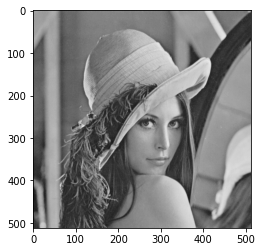

In [100]:
cwd = os.getcwd()                                            # get current directory
img = cv2.imread(cwd+"/Lena.png") 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # Convert to grayscale
#gray_img=gray_img[80:85,80:85]
plt.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)


Adding salt and pepper noise


In [101]:
## Function to add salt and pepper noise
def sp_noise(image,prob):

    output = np.copy(image)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [102]:
## Add sp noise no to input gray image X 10
noise_gray_img=[]
for i in range(1,11):
    noise_gray_img.append(sp_noise(gray_img,0.1*i))

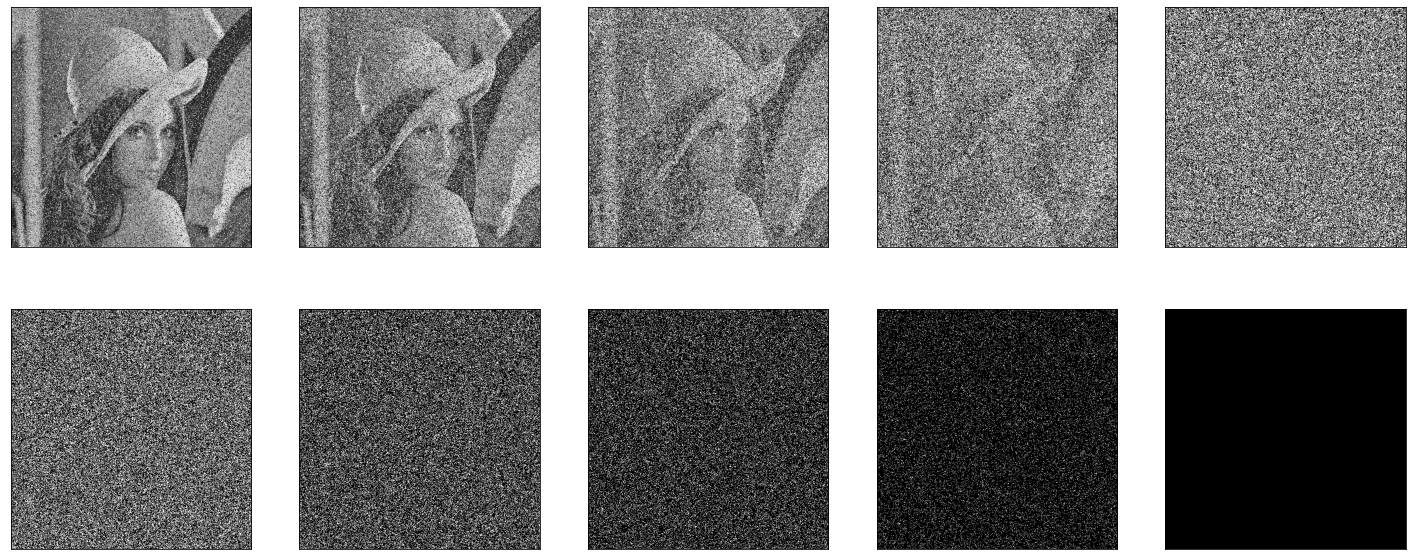

In [103]:
## Display noise image
f = plt.figure()
f.set_figwidth(5*5)
f.set_figheight(2*5)

for i in range(10):
    # display Different Angle
    
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(noise_gray_img[i],  cmap='gray', vmin = 0, vmax = 255)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.subplots_adjust(hspace = 0.25 )
plt.show()  

In [104]:
## done

def average_filter(src_img, filter_size):

    output = np.zeros(src_img.shape,np.uint8)
    img_size=len(src_img)
    print(img_size)
    index=filter_size//2

    
    #canvas[6:506, 6:506] = src_img
    
    for i in range(img_size):
        for j in range(img_size):
            
            temp=src_img[(i-index) if i-index+1>0 else i:(i+index+1) if i+index-1<img_size else i,(j-index) if j-index+1>0 else j : (j+index)+1 if j+index-1<img_size else j]
            #print(src_img)
            #print("-------------")
            #print(temp)
            output[i][j]=round(np.sum(temp*1/np.size(temp)))
              #print(len(src_img[0:1][0:1]))
            #temp=src_img[(i-index) if i-index>0 else i :i+index][j-index:j+index] 
    return output

            


In [105]:
ave_img=average_filter(noise_gray_img[0], 3)
print(len(ave_img))

512
512


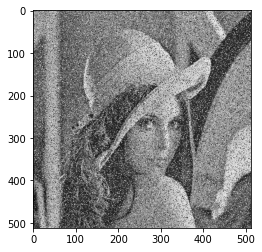

In [106]:
plt.imshow(noise_gray_img[0], cmap='gray', vmin = 0, vmax = 255)

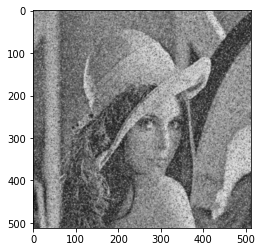

In [107]:
plt.imshow(ave_img, cmap='gray', vmin = 0, vmax = 255)

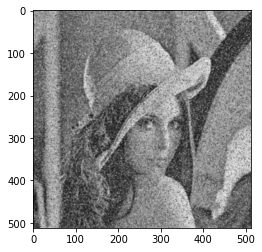

In [108]:
avg1=cv2.blur(noise_gray_img[0],(3,3))
plt.imshow(avg1, cmap='gray', vmin = 0, vmax = 255)

In [109]:
array1 = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])
print(array1)
print("---------",len(array1))
index=1
i=0
j=0
img_size=len(array1)
array2=array1[(i-index) if i-index+1>0 else i:(i+index+1) if i+index-1<img_size else i,(j-index) if j-index+1>0 else j : (j+index)+1 if j+index-1<img_size else j]
print(array2,np.sum(array2),np.size(array2))


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
--------- 5
[[1 2]
 [6 7]] 16 4


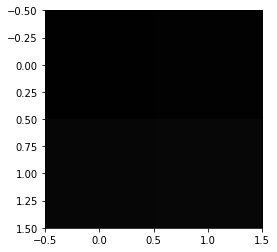

In [110]:
plt.imshow(array2, cmap='gray', vmin = 0, vmax = 255)

In [111]:
## Average of noisy images
average_img=np.zeros(noise_gray_img[0].shape,np.double)
for im in noise_gray_img:
    average_img=average_img+np.array(im,dtype=np.double)/10
average_img=np.array(np.round(average_img),dtype=np.uint8)   


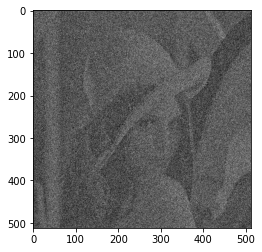

In [112]:
## Display Average of noisy images
plt.imshow(average_img, cmap='gray', vmin = 0, vmax = 255) 

In [113]:
## For quantitative observation
reference_gray_image=gray_img

for i in range(10):
    rmse=math.sqrt(np.mean(np.square(reference_gray_image-noise_gray_img[i])))
    print(rmse)
    noise_gray_img.append(rmse)  
gray_image_rmse=np.array(noise_gray_img)      
rmse=math.sqrt(np.mean(np.square(average_img-noise_gray_img[i]))) 
print(rmse)

4.621814352363674
6.5118845350446675
7.973131837542142
9.197010956205524
10.279049159505716
10.271859097794866
10.27681184187493
10.280561893707064
10.284816691425313
10.286938980397705
10.362172665274919


C:\Users\ICPSPR~1\AppData\Local\Temp/ipykernel_6064/2235735322.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  gray_image_rmse=np.array(noise_gray_img)


Refer


https://github.com/KiranThomasCherian/Computer-Vision-And-Digital-Image-Processing/blob/main/Assignment%202/QUESTION_1.ipynb